Teamnaam: Ongeneeselijk ziek

Teamleden:
1. needanku (Tijn)
2. jipschijvenaars (Jip)
3. joesvandeursen (Joes)
4. jimaugustinus (Jim)


# Import

In [1]:
# nodig om lightGBM te gebruiken
!pip install scikit-learn lightgbm
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.2/124.9 MB 2.5 MB/s eta 0:00:51
   ---------------------------------------- 0.6/124.9 MB 4.4 MB/s eta 0:00:29
   ---------------------------------------- 1.1/124.9 MB 6.4 MB/s eta 0:00:20
    --------------------------------------- 1.6/124.9 MB 7.3 MB/s eta 0:00:17
    --------------------------------------- 2.1/124.9 MB 8.5 MB/s eta 0:00:15
    --------------------------------------- 2.4/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 3.3/124.9 MB 9.2 MB/s eta 0:00:14
   - -------------------------------------- 3.9/124.9 MB 9.5 MB/s eta 0:00:13
   - -------------------------------------- 4.1/124.9 MB 9.3 MB/s eta 0:00:14
   - -------------------------------------- 4.1/124.9 MB 9.3 MB/s eta 0:00:14
   - -------------------------------------- 4.1/124.9 MB 9.3 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, classification_report, roc_auc_score, accuracy_score

In [7]:
train_data = pd.read_csv('train1.csv')
test_data = pd.read_csv('test1.csv')
display(train_data)
display(test_data)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,71911,9.0,0,0,109.80,14.5,False,True,False,True,...,False,False,False,True,True,False,False,False,False,0
33546,19648,47.0,0,0,88.61,30.8,True,False,False,False,...,False,True,False,False,False,True,False,False,False,0
33547,35550,3.0,0,0,89.68,16.2,True,False,False,True,...,False,False,False,True,True,False,False,False,False,0
33548,65453,56.0,1,0,82.44,27.8,True,False,False,False,...,False,False,False,False,False,True,False,False,True,0


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,32840,52.0,0,0,97.32,21.8,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,45158,30.0,0,0,227.99,47.7,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,56105,26.0,0,0,113.28,24.4,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
3,3112,24.0,0,0,79.15,21.0,True,False,False,False,...,False,False,True,False,False,False,True,True,False,False
4,35224,63.0,0,0,89.69,33.3,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8383,60672,24.0,0,0,77.54,25.0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
8384,25989,17.0,0,0,99.99,22.7,True,False,False,True,...,False,False,False,True,False,True,False,False,True,False
8385,34072,11.0,0,0,80.11,22.2,True,False,False,True,...,False,False,False,False,True,False,True,False,False,False
8386,32400,16.0,0,0,105.26,47.5,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False


### Uitleg van de datasetkolommen

De dataset bevat informatie over patiënten met betrekking tot hun gezondheid en leefstijl. Dit zijn die kolommen en wat ze betekenen:

1. **id**: Unieke identifier voor elke patiënt in de dataset.

2. **age**: De leeftijd van de patiënt.

3. **hypertension**: Indicator of de patiënt aan hypertensie (hoge bloeddruk) lijdt.
   - **0**: Geen hypertensie.
   - **1**: Wel hypertensie.

4. **heart_disease**: Indicator of de patiënt lijdt aan hartziekten.
   - **0**: Geen hartziekte.
   - **1**: Wel hartziekte.

5. **avg_glucose_level**: Het gemiddelde glucosegehalte in het bloed van de patiënt.

6. **bmi**: Body Mass Index (BMI) van de patiënt, een maat voor gezond gewicht gebaseerd op lengte en gewicht.

7. **gender_Female**: Dummy-variabele die aangeeft of de patiënt vrouw is.
   - **False**: Niet vrouw.
   - **True**: Vrouw.

8. **gender_Male**: Dummy-variabele die aangeeft of de patiënt man is.
   - **False**: Niet man.
   - **True**: Man.

9. **gender_Other**: Dummy-variabele die aangeeft of de patiënt zich identificeert als een andere genderidentiteit.
   - **False**: Niet anders.
   - **True**: Anders.

10. **ever_married_No**: Dummy-variabele die aangeeft of de patiënt nooit getrouwd is geweest.
    - **False**: Heeft wel ooit getrouwd geweest.
    - **True**: Heeft nooit getrouwd geweest.

11. **ever_married_Yes**: Dummy-variabele die aangeeft of de patiënt ooit getrouwd is geweest.
    - **False**: Heeft nooit getrouwd geweest.
    - **True**: Heeft wel ooit getrouwd geweest.

12. **work_type_Govt_job**: Dummy-variabele die aangeeft of de patiënt een overheidsbaan heeft.
    - **False**: Geen overheidsbaan.
    - **True**: Wel een overheidsbaan.

13. **work_type_Never_worked**: Dummy-variabele die aangeeft of de patiënt nooit heeft gewerkt.
    - **False**: Heeft wel ooit gewerkt.
    - **True**: Heeft nooit gewerkt.

14. **work_type_Private**: Dummy-variabele die aangeeft of de patiënt in de private sector werkt.
    - **False**: Werkt niet in de private sector.
    - **True**: Werkt in de private sector.

15. **work_type_Self-employed**: Dummy-variabele die aangeeft of de patiënt zelfstandig ondernemer is.
    - **False**: Niet zelfstandig ondernemer.
    - **True**: Wel zelfstandig ondernemer.

16. **work_type_children**: Dummy-variabele die aangeeft of de patiënt een kind is en dus niet werkt.
    - **False**: Niet een kind.
    - **True**: Wel een kind.

17. **Residence_type_Rural**: Dummy-variabele die aangeeft of de patiënt in een landelijk gebied woont.
    - **False**: Woont niet in een landelijk gebied.
    - **True**: Woont in een landelijk gebied.

18. **Residence_type_Urban**: Dummy-variabele die aangeeft of de patiënt in een stedelijk gebied woont.
    - **False**: Woont niet in een stedelijk gebied.
    - **True**: Woont in een stedelijk gebied.

19. **smoking_status_formerly smoked**: Dummy-variabele die aangeeft of de patiënt in het verleden gerookt heeft.
    - **False**: Heeft niet gerookt in het verleden.
    - **True**: Heeft wel gerookt in het verleden.

20. **smoking_status_never smoked**: Dummy-variabele die aangeeft of de patiënt nooit heeft gerookt.
    - **False**: Heeft wel gerookt.
    - **True**: Heeft nooit gerookt.

21. **smoking_status_smokes**: Dummy-variabele die aangeeft of de patiënt momenteel rookt.
    - **False**: Rookt niet.
    - **True**: Rookt wel.

22. **stroke**: De target-variabele die aangeeft of de patiënt een beroerte heeft gehad.
    - **0**: Geen beroerte.
    - **1**: Wel een beroerte.



# EDA

Numerieke waarden: Alle invoer moet numeriek zijn.

Geen ontbrekende waarden: Er mogen geen NaN of ontbrekende waarden in de dataset zijn.

En een Pandas Dataframe.

In [9]:
display(train_data.dtypes)

id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
gender_Female                        bool
gender_Male                          bool
gender_Other                         bool
ever_married_No                      bool
ever_married_Yes                     bool
work_type_Govt_job                   bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
Residence_type_Rural                 bool
Residence_type_Urban                 bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
stroke                              int64
dtype: object

### Uitleg van de Data-inspectie

In onderstaande lijst worden de datatypes van elke kolom in de dataset weergegeven. De datatypes zijn belangrijk om te begrijpen hoe de gegevens zijn opgeslagen en om te bepalen of er aanpassingen nodig zijn voor verdere analyse of machine learning. Hieronder volgt een uitleg van elk datatype en of er aanpassingen nodig zijn:

1. **`int64`**: Dit betekent dat de kolom geheel getallen (integers) bevat. 
   - Kolommen zoals `id`, `hypertension`, `heart_disease`, en `stroke` zijn als integers opgeslagen, wat logisch is aangezien deze kolommen discrete waarden vertegenwoordigen (zoals ja/nee of unieke identificatienummers).

2. **`float64`**: Dit betekent dat de kolom decimale getallen (floats) bevat.
   - Kolommen zoals `age`, `avg_glucose_level`, en `bmi` zijn als floats opgeslagen omdat deze waarden continue numerieke gegevens vertegenwoordigen die decimalen kunnen bevatten.

3. **`bool`**: Dit betekent dat de kolom booleaanse waarden (True/False) bevat.
   - Dit is van toepassing op kolommen zoals `gender_Female`, `gender_Male`, en andere die binaire gegevens bevatten (bijvoorbeeld of iemand vrouw/man is, of een bepaalde werkstatus heeft).

### Moeten we iets aanpassen?

- **Ja, alle kolommen moeten numeriek zijn**: 
  - Hoewel de dataset booleaanse waarden bevat, moeten deze worden omgezet naar binaire numerieke waarden (`0` en `1`). Dit zorgt ervoor dat de dataset compatibel is met alle machine learning-algoritmen in Scikit-Learn.

### Aanpassingen:
- **Converteer `bool` naar `int`**:
  - De kolommen die als `bool` zijn gemarkeerd (bijvoorbeeld `gender_Female`, `work_type_Govt_job`, etc.) moeten worden omgezet naar `int` waarbij `True` wordt omgezet naar `1` en `False` naar `0`.

Hierna is de dataset volledig numeriek en klaar voor gebruik in machine learning-modellen.


In [10]:
train_data = train_data.astype(int)

print(train_data.dtypes)
display(train_data)

id                                int32
age                               int32
hypertension                      int32
heart_disease                     int32
avg_glucose_level                 int32
bmi                               int32
gender_Female                     int32
gender_Male                       int32
gender_Other                      int32
ever_married_No                   int32
ever_married_Yes                  int32
work_type_Govt_job                int32
work_type_Never_worked            int32
work_type_Private                 int32
work_type_Self-employed           int32
work_type_children                int32
Residence_type_Rural              int32
Residence_type_Urban              int32
smoking_status_formerly smoked    int32
smoking_status_never smoked       int32
smoking_status_smokes             int32
stroke                            int32
dtype: object


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30,0,0,63,33,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1,72295,75,1,0,215,48,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,26451,15,0,0,135,19,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3,65210,47,0,0,64,28,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,69299,49,0,0,222,28,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,71911,9,0,0,109,14,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
33546,19648,47,0,0,88,30,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
33547,35550,3,0,0,89,16,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
33548,65453,56,1,0,82,27,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# missende waardes

In [11]:
missing_values = train_data.isnull().sum()
print(missing_values)


id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
stroke                            0
dtype: int64


## Verwijderen van niet nuttige colommen
- id: ID heeft geen enkele voorspellende waarde. Dit komt omdat dit een identifier is en kan dus verwijdert worden.
- gender_Other: Hoe je jezelf identificeert heeft geen invloed op of je en hartinfarct krijgt of niet. Deze is dan dus ook niet belangrijk voor ons en kan verwijdert worden.
- work_type_children: Dit geeft aan of de patient een kind is. Hartinfarcten zijn ouderdoms kwalen en hebben dus niet te maken met kinderen. Hierdoor kunnen we deze verwijderen.
- ever_married_No en ever_married_Yes: Of je getrouwd bent of niet heeft niks te maken met of je een harinfarct krijgt of niet. Hierdoor kunnen we al gauw bepalen dat deze weg kan.

In [14]:
train_data = train_data.drop(columns=['id', 'gender_Other', 'work_type_children', 'ever_married_No', 'ever_married_Yes'])
print(train_data.columns)


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'],
      dtype='object')


### Wat is Standaardiseren van Data?

Standaardiseren van data is het proces waarbij de waarden van een dataset worden omgezet naar een gemeenschappelijke schaal. Hierdoor worden de waarden vergelijkbaar. Dit gebeurt meestal door de waarden te schalen naar z-scores of door ze te centreren en te schalen. Het doel is om de invloed van verschillende schalen van variabelen te verminderen, vooral als sommige variabelen grotere of kleinere waarden hebben dan andere.

#### Formule voor Standaardisatie

De standaardisatie van een variabele \(X\) wordt vaak gedaan met de volgende formule:

\[
Z = \frac{(X - \mu)}{\sigma}
\]

waarbij:
- \(Z\) de genormaliseerde waarde is.
- \(X\) de oorspronkelijke waarde is.
- \(\mu\) het gemiddelde van de dataset is.
- \(\sigma\) de standaardafwijking van de dataset is.

### Wanneer is Standaardisatie Gewenst?

Standaardisatie is vooral gewenst in de volgende gevallen:

1. **Algoritmen die gevoelig zijn voor schaling**: Sommige machine learning-algoritmen, zoals K-Nearest Neighbors (KNN), Support Vector Machines (SVM), en Neural Networks, zijn gevoelig voor de schaling van de inputgegevens. Als variabelen verschillende schalen hebben, kan dit de resultaten van het model negatief beïnvloeden.

2. **Data die niet normaal verdeeld is**: Standaardisatie kan helpen om data die niet normaal verdeeld is, meer normaal te maken. Dit kan helpen bij het verbeteren van de prestaties van bepaalde modellen.

3. **Vergelijking van variabelen**: Als je verschillende variabelen met verschillende eenheden en schalen hebt, kan standaardisatie helpen om deze variabelen gelijkwaardig te maken, zodat je ze beter kunt vergelijken.

### Waarde voor deze Dataset

In de gegeven dataset zijn er verschillende numerieke variabelen zoals `age`, `avg_glucose_level`, en `bmi`. Omdat deze variabelen op verschillende schalen zijn, kan standaardisatie nuttig zijn, vooral als we algoritmen gaan gebruiken die gevoelig zijn voor schaling.



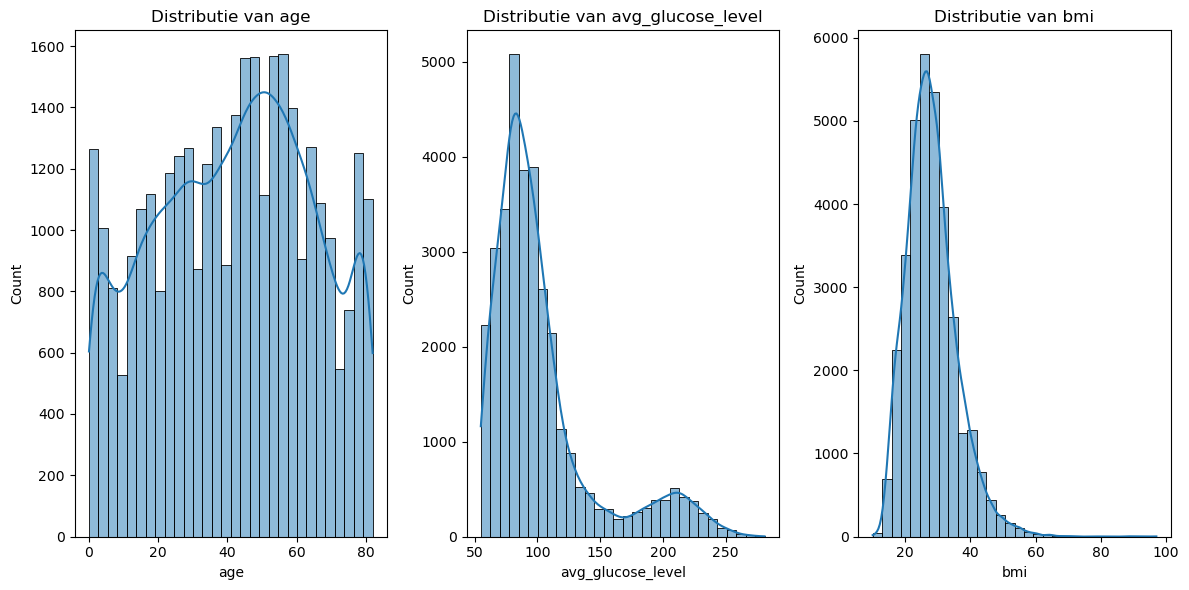

In [15]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(train_data[col], bins=30, kde=True)
    plt.title(f'Distributie van {col}')

plt.tight_layout()
plt.show()

### Opdracht 2: Evaluatie

Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaalt kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritme

In [16]:
X = train_data.drop('stroke', axis=1)
y = train_data["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\jvand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


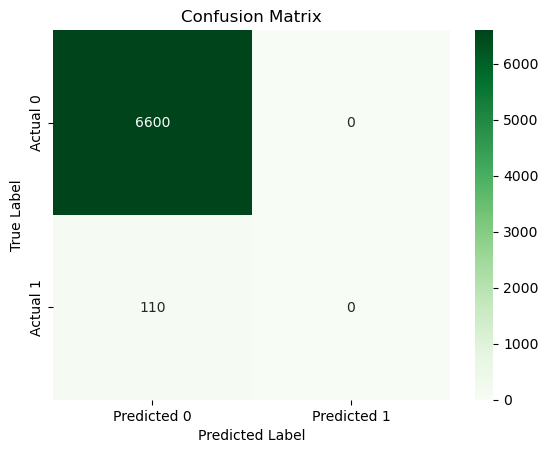

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Opdracht 3: modelleren

#### KNN
- **Hoe werkt KNN?**

KNN voorspelt de klasse of waarde van een nieuw punt door te kijken naar de K dichtstbijzijnde punten in de dataset. De afstand tussen punten wordt gemeten met bijvoorbeeld de Euclidische afstand of de Manhattan afstand. Het nieuwe punt krijgt de klasse van de meerderheid van zijn buren of het gemiddelde.

- **Waarom is standaardisatie belangrijk?**

Omdat KNN afstanden tussen punten gebruikt, moeten alle kenmerken op dezelfde schaal liggen. Standaardisatie zorgt ervoor dat kenmerken zoals lengte en gewich niet onevenredig bijdragen aan de afstand. Zonder standaardisatie kan een kenmerk met een grotere schaal de afstandsberekening domineren.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler



In [24]:
# Laad het KNeighborsClassifier model
model = KNeighborsClassifier()

# Schaal de trainingsdata (X_train) zodat ze een standaard normalisatie krijgen
# Dit past de schaal aan zodat elke feature een gemiddelde van 0 en een standaardafwijking van 1 heeft
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Stel het parameter grid op voor de GridSearch
# Dit bevat verschillende waarden voor n_neighbors (het aantal buren), de weight strategy, en de afstandsmetric
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Voer de Grid Search uit: het model wordt getraind voor elke combinatie van hyperparameters
# en de beste hyperparameters worden gekozen op basis van de hoogste F1-score
grid = GridSearchCV(model, param_grid, refit=True, scoring='f1', cv=5) 
grid.fit(X_train_scaled, y_train)

# Toont de beste parameters en score
print("Beste parameters:", grid.best_params_)
print("Beste F1-score:", grid.best_score_)
# https://chatgpt.com/share/6708eb8f-c6b4-8008-921d-da5fba0e9b1b

X_test_scaled = scaler.transform(X_test)

y_pred = grid.best_estimator_.predict(X_test_scaled)

Beste parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Beste F1-score: 0.026538658194113485


In [25]:
kolommen_verwijderen = ['id', 'gender_Other', 'work_type_children', 'ever_married_No', 'ever_married_Yes']
X_test = test_data.drop(columns=kolommen_verwijderen)

X_test_scaled = scaler.transform(X_test)

y_pred = grid.best_estimator_.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_data['id'], 
    'stroke': y_pred     
})

submission_file = 'submission_knn.csv'
submission.to_csv(submission_file, index=False)

print(f"Submissie bestand {submission_file} succesvol opgeslagen.")

os.system(f'kaggle competitions submit -c voorspellen-van-hartinfarct -f {submission_file} -m "KNN model submission"')


Submissie bestand submission_knn.csv succesvol opgeslagen.


0

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp

- **Hoe werkt regularisatie voor dit model?**

Regularisatie in dit model gebeurt voornamelijk door het aanpassen van de K-waardedoor middel van meer of minder buren, door het gewicht van de buren te regelen, en door de juiste afstandsmaat te kiezen. Dit helpt om te voorkomen dat het model te veel details leert, wat leidt tot overfitting, en maakt het robuuster en beter in het generaliseren naar nieuwe data. Tegelijkertijd zorgt een goede afstemming van de K-waarde en gewichten ervoor dat het model niet te veel vereenvoudigt, wat kan leiden tot underfitting.
#### Logistic Regression

**Hoe werkt het model?**
Logistic Regression is een model dat gebruikt wordt voor binaire classificatie. Het model voorspelt de kans dat een invoer bij een bepaalde klasse hoort bijvoorbeeld 0 of 1. 

Het werkt door een lineaire combinatie van de inputvariabelen te nemen en deze door een sigmoid functie te halen, die de output omzet in een kanswaarde tussen 0 en 1.


**Wiskundige formule voor de loss-functie**
De loss-functie die bij Logistic Regression wordt gebruikt, is de log loss (of kruis-entropie).

Loss(y, ŷ) = -1/m * Σ [yᵢ * log(ŷᵢ) + (1 - yᵢ) * log(1 - ŷᵢ)]

waarbij:
- **m** = het aantal datapunten,
- **yᵢ** = de werkelijke waarde (0 of 1),
- **ŷᵢ** = de voorspelde kanswaarde.


**Wat is gradient descent?**
Gradient descent is een manier om de parameters van het model de coëfficiënten te optimaliseren. Het werkt door in de richting van de grootste stijging van de loss-functie te bewegen, en daarna in de tegenovergestelde richting om de loss te verlagen.

In [26]:
# Schaal de trainingsdata (X_train) door deze aan te passen aan de schaalverdeling van de dataset
# Dit zorgt ervoor dat alle features een gemiddelde van 0 en een standaardafwijking van 1 krijgen
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)

# max_iter=1000 betekent dat het model maximaal 1000 keer mag herhalen om een oplossing te vinden.
# class_weight='balanced' zorgt ervoor dat het model rekening houdt met de minder vaak voorkomende klasse,
# door deze meer gewicht te geven zodat ze even belangrijk zijn als de veel voorkomende klasse.
model = LogisticRegression(max_iter=1000, class_weight='balanced')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# scoring='f1' betekent dat we het model evalueren op basis van de F1-score, wat belangrijk is bij ongebalanceerde datasets
# cv=5 betekent dat we 5-fold cross-validation gebruiken om robuuste schattingen te krijgen
# Voer de Grid Search uit, waarbij alle combinaties van hyperparameters uit het param_grid worden geprobeerd
grid = GridSearchCV(model, param_grid, scoring='f1', cv=5)
grid.fit(X_train_scaled, y_train)

# Toont de beste parameters en score
print("Beste parameters:", grid.best_params_)
print("Beste F1-score:", grid.best_score_)

X_test_scaled = scaler.transform(X_test)

y_pred = grid.best_estimator_.predict(X_test_scaled)
# https://brightspace.hhs.nl/d2l/le/lessons/56649/lessons/594770

Beste parameters: {'C': 0.01, 'penalty': 'l2'}
Beste F1-score: 0.09068991094108217


C:\Users\jvand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jvand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jvand\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jvand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

In [30]:
kolommen_verwijderen = ['id', 'gender_Other', 'work_type_children', 'ever_married_No', 'ever_married_Yes']
X_test = test_data.drop(columns=kolommen_verwijderen)

X_test_scaled = scaler.transform(X_test)

y_pred = grid.best_estimator_.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_data['id'], 
    'stroke': y_pred     
})

submission_file = 'submission.csv'
submission.to_csv(submission_file, index=False)

print(f"Submissie bestand {submission_file} succesvol opgeslagen.")

os.system(f'kaggle competitions submit -c voorspellen-van-hartinfarct -f {submission_file} -m model submission"')

Submissie bestand submission.csv succesvol opgeslagen.


1

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

- **Hoe werkt regularisatie voor dit model?**

In dit model hebben we L1-regularisatie en L2-regularisatie gebruikt. De beste regularisatievorm bleek L2-regularisatie te zijn, met een waarde van C = 0.01.

1. L1-regularisatie (Lasso)

L1-regularisatie voegt een straf toe aan de verliesfunctie die gebaseerd is op de som van de absolute waarden van de gewichten. Dit dwingt sommige gewichten naar nul, waardoor bepaalde kenmerken (features) niet worden gebruikt in het model.


Effect van L1-regularisatie:
- Het verwijdert onbelangrijke kenmerken, wat het model eenvoudiger maakt.
- Het helpt bij kenmerkselectie, waardoor de prestaties verbeteren.

2. L2-regularisatie (Ridge)

L2-regularisatie voegt een straf toe die gebaseerd is op de som van de kwadraten van de gewichten. Dit zorgt ervoor dat alle gewichten kleiner worden, maar niet nul.


Effect van L2-regularisatie:
- Het verkleint alle gewichten zonder ze naar nul te dwingen.
- Dit maakt het model robuuster en helpt overfitting te voorkomen.

https://chatgpt.com/share/6708efa2-9500-8008-894b-955b57ce5067

![Screenshot%202024-10-11%20113429.png](attachment:Screenshot%202024-10-11%20113429.png)

![Screenshot%202024-10-11%20113447.png](attachment:Screenshot%202024-10-11%20113447.png)

- **Beschrijf hoe regularisatie zich verhoudt ten opzichte van overfitting**
Door regularisatie voorkom je overfitting. Door het model eenvoudiger te maken, zorgt regularisatie ervoor dat het model de belangrijke patronen in de data leert, zonder zich te laten misleiden door fouten of ruis. Dit leidt tot betere prestaties op nieuwe data en maakt het model robuuster.

In [ ]:
best_model = grid.best_estimator_

coefficients = best_model.coef_[0]  
intercept = best_model.intercept_[0]

feature_importance = pd.DataFrame({
    'Feature': X.columns, 
    'Coefficient': coefficients
})

print(feature_importance)

#### SVM

- **Hoe werkt SVM?**

    SVM (Support Vector Machine) zijn machine learning modellen die kunnen worden gebruikt voor zowel regressie als classificatie. Het idee van SVM is dat er een lijn (2D) of hypervlak (3D) wordt gevonden die de data het beste kan scheiden tussen de verschillende klasses. Het hypervlak wordt gekozen door te kijken wanneer de marge tussen de verschillende klassen zo groot mogelijk is. Marge staat voor de afstand tussen de lijn/hypervlak en de dichtsbijzijne punt aan weerzijde van de lijn.Hierbij worden de punten het dichtst bij het hypervlak (support vectors) gebruikt voor het bepalen van de scheidingslijn. 

- **Wat is een kernel en wat is de kernel trick?**

    Een kernel is een functie die het mogelijk maakt om in die hogere-dimensionale ruimte te werken zonder dat de transformatie wordt berekend. Dit maakt het model een stuk efficiënter.

    Een SVM gebruikt een techniek die de "kernel trick" wordt genoemd wanneer de data niet-lineair zijn. Bij deze techniek worden de data getransformeerd naar een nieuwe hogere dimensionale ruimte, waar ze lineair kunnen worden gemodelleerd of lineair kunnen worden gescheiden. In plaats van een complexe functie te gebruiken om de gegevens te transformeren, modelleert de kernel trick de functie tussen elk paar getransformeerde punten (de "kernel" functie). Hierdoor kan de SVM uiterst complexe niet-lineaire functies modelleren zonder deze functies daadwerkelijk te hoeven schrijven.

- **Welke loss-functie hoort bij SVM?**

    De loss-functie die wordt gebruikt voor SVM's is de Hinge-loss. De formule van de hinge-loss staat hieronder:

    $L$($y_{i}, f(x_{i}))$ = $max(0,1-y_{i}f(x_{i}))$

    De variabelen van deze functie zijn alsvolgt:
    - $L$: waarde voor de hinge-loss
    - $y_{1}$: daadwerkelijk waarde
    - $f(x_{i})$*: voorspelde waarde van het model 
    
    *$f(x_{i})$ kan ook worden geschreven als $w^{T} x_{i} +b$

- **Welke vorm van regularisatie gebruiken SVM's?**

    SVM's maken gebruik van $L_{2}$-regularisatie. Deze vorm van regularisatie wordt ook wel ridge-regressie genoemd. De formule van ridge-regressie is als volgt:

    $J(w)$ = $RSS + λ$ $\sum_{j = 1}^{p}$ $w^{2}_{j}$

    Hieronder staat de betekenis van de verschillende variabelen:
    - $RSS$: ook wel de *Residual sum of squares* genoemd staat voor de foutterm van de lineaire regressie zelf. 
    -  $λ$: Dit is de regularisatieparameter en controleert de mate van regularisatie.
    - $w^{2}_{j}$: Dit is de L2-norm van de gewichten $w$. Deze bepaald hoe erg alle features worden "gestraft"

    Door de vorm van regularisatie te gebruiken worden de verschillende features van het model meer in verhouding getrokken. Zo wegen features die veel meer invloed hebben op het uiteindelijke eindresultaat meer mee dan feautures die weinig invloed hebben. In teggenstelling tot L1-regularisatie (Lasso-regressie) worden de features niet volledig verwijderd maar heel klein gemaakt. 

    



In [ ]:
# Initiëren van een SVM model
svm = SVC()

# Parameter grid maken voor parametertuning
param_grid_svm = {
    'C': [0.1, 1, 10],          
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],         
}

# Gridseach gerbuiken om de optimalen parameters te vinden
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, scoring='f1', cv=5,  n_jobs=-1)

# Model met optimale parameters trainen en testen
grid_search_svm.fit(X_train, y_train)
y_pred = grid_search_svm.predict(X_test)

# f1-score van het model op de testset berekenen
f1_svm = f1_score(y_test, y_pred)

# Printen van de beste parameters en de f1-score van de testset
print("Beste parameters:", grid_search_svm.best_params_)
print("f1-score testset:", f1_svm)


In [ ]:

kolommen_verwijderen = ['id', 'gender_Other', 'work_type_children', 'ever_married_No', 'ever_married_Yes']
X_test = test_data.drop(columns=kolommen_verwijderen)

X_test_scaled = scaler.transform(X_test)

y_pred = grid_search_svm.best_estimator_.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_data['id'], 
    'stroke': y_pred       
})

submission_file = 'submission_svm.csv'
submission.to_csv(submission_file, index=False)

print(f"Submissie bestand {submission_file} succesvol opgeslagen.")

os.system(f'kaggle competitions submit -c voorspellen-van-hartinfarct -f {submission_file} -m "model submission"')


#### Decision Tree

- **Hoe werkt een decision tree?**

    Een decision tree (beslisboom) voert verschillende stappen uit. Het doel van een beslisboom is om de dataset steeds verder op te splitsen op basis van verschillende features totdat dit niet meer kan. 

    1. Een decision tree begint bij de *root*. De root kan worden gezien als de hele dataset. Vervolgens wordt deze root in 2 of meer groepen verdeeld op basis van een kenmerk zoals bijvoorbeeld leeftijd. Deze nieuwe groepen vormen nu elke hun eigen *internal node*.
    2. Vervolgens kunnen deze nieuwe internal nodes weer worden opgesplitst op basis van een nieuw kenmerk. Dit gaat door totdat de dataset niet meer verder kan worden gesplitst. Wanneer dit zo is, ontstaat er een *leaf*. Deze leaf kan worden gezien als de uiteindelijk voorspelling van het model.
    3. Om te kiezen hoe de root of internal node gesplitst wordt, wordt er gekeken naar wanneer de *information gain* zo hoog mogelijk is. Er wordt gekeken naar welke waarde een bepaalde feature moet hebben om de data in zoveel mogelijk samples te verdelen.
    4. Elke route van de root naar een van de leafs wordt een *branch* genoemd.

- **Op basis van welke criteria kunnen splitsingen in een decision tree worden gemaakt?**

    Er zijn 2 verschillende criteria op basis waarvan splitsing kunnen worden gemaakt in een decision tree. Deze worden hier 1 voor 1 behandeld. 

    1. Gini-impurity: deze critecria meet "zuiverheid" van een splitsing. Dit betekend dat wanneer een node niet meer verder gesplists kan worden, de node volledig "zuiver" is en de Gini-impurity waarde 0 zal zijn. Dat een node "zuiver" is betekend dat alle datapunten tot dezelfde klasse behoren. De node zal hier dus een leaf worden. Het doel bij elke splitsing is om de waarde voor gini zo laag mogelijk te maken.
    2. Entropy: deze criteria meet hoeveel informatie er wordt gewonnen bij het maken van een splitsing. De waarde van entropy geeft de spreiding van de data weer. Het doel bij entropy is dus om bij elke splitsing deze waarde omlaag te krijgen waardoor de **information gain** zo groot mogelijk zal zijn.


In [31]:
# Initiëren van een decision tree model
dt = DecisionTreeClassifier()

# Parameter grid maken voor parametertuning
param_grid_dt = {
    'max_depth': [15, 20, 25, 30, 35, 40, 45],         
    'min_samples_split': [2, 3, 4, 5, 10],            
    'min_samples_leaf': [1, 2, 3, 4, 5],            
    'criterion': ['gini', 'entropy']     
}

# Gridseach gerbuiken om de optimalen parameters te vinden
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring="f1", cv=5, n_jobs=-1)

# Model met optimale parameters trainen en testen
grid_search_dt.fit(X_train, y_train)
y_pred_dt = grid_search_dt.predict(X_test)

# f1 score van het model op de testset berekenen
f1_dt = f1_score(y_test, y_pred_dt)

# Printen van de beste parameters en de f1-score van de testset
print("Beste parameters:", grid_search_dt.best_params_)
print("f1-score testset:", f1_dt)

ValueError: Found input variables with inconsistent numbers of samples: [6710, 8388]

In [ ]:

kolommen_verwijderen = ['id', 'gender_Other', 'work_type_children', 'ever_married_No', 'ever_married_Yes']
X_test = test_data.drop(columns=kolommen_verwijderen)

X_test_scaled = scaler.transform(X_test)

y_pred_dt = grid_search_dt.best_estimator_.predict(X_test_scaled)

submission_dt = pd.DataFrame({
    'id': test_data['id'], 
    'stroke': y_pred_dt     
})

submission_file_dt = 'submission_dt.csv'
submission_dt.to_csv(submission_file_dt, index=False)

print(f"Submissie bestand {submission_file_dt} succesvol opgeslagen.")

os.system(f'kaggle competitions submit -c voorspellen-van-hartinfarct -f {submission_file_dt} -m "decision tree model submission"')


- **Wat is "pruning" en hoe wordt deze toegepast op het model?**

    Pruning is een techniek die wordt gebruikt bij het maken van decision tree's om zo overfitting te verminderen en zo de prestatie van het model te verbeteren. Dit wordt gedaan door splitisingen die niet nodig of te complex zijn te verwijderen. Door deze onnodige splitsingen te verwijderen zal het model beter andere datasets kunnen generaliseren wat de overfitting zal verminderen en de prestatie zal verbeteren.

    In dit model is "pruning" op 3 verschillende manieren toegepast:
    1. 'max_depth', door de max depth kleiner te maken zullen er minder splitsingen gedaan worden wat ervoor zal zorgen dat er minder overfitting kan zijn.
    2. 'min_samples_leaf', deze parameter bepaald hoeveel datapunten een leaf minimaal moet hebben om niet meer door te mogen splitsen.  Door deze parameter groter te maken zal het model minder mogelijkheden hebben om onnodige splitsingen te maken en zo overfitting tegen te gaan.
    3. 'min_samples_split', deze parameter geeft aan hoeveel datapunten een node minimaal moet hebben om nog verder te mogen splitsen. Hier wordt op dezelfde manier als bij *min_samples_leaf* overfitting tegen gegaan door het aantal onnodige splitsingen te verminderen. 

- **Wat is de relatie tussen "pruning" en overfitting/underfitting?**

    **Overfitting**: overfitting ontstaat wanneer een model te complex is en teveel verbanden tussen data herkent. Een decision tree die niet gebruik maakt van pruning is vaak te groot. Dit zorgt ervoor data de decision tree bijvoorbeeld te vaak wordt gesplitst op basis van features die niet nuttig zijn. Er is hier dan sprake van overfitting. Wanneer een decision tree wel gebruikt maakt van pruning zal dit niet voorkomen en wordt de overfitting dus tegengegaan.

    **Underfitting**: underfitting ontstaat wanneer een model te simpel is en niet instaat is om eenvoudige verbanden tussen de data te herkennen. Wanneer een decision tree teveel pruning gebruikt zal het model bijvoorbeeld niet vaak genoeg gesplitst worden of gesplitst op niet relevante data waardoor het model te simpel wordt en dus underfitting vertoont. 

### ***Modellen trainen***
#### *RandomForest*
Random forest zijn allemaal decisiontrees bij elkaar. Deze decisiontrees maken gebruik van **bagging (bootstrap aggregation)** wat inhoud dat meerdere modellen onafhankelijk van elkaar getrained worden. Dit gebeurt wel op stukjes van de data, ook wel subsets genoemd. Bij elke splitsing worden er ook willekeurig features gekozen. Dit onafhankelijk trainen van elkaar geeft aan dat deze ensemble **parallel** is. Dit heeft als voordeel dat de trainingstijd een stuk lager is dan modellen die sequentieel trainen. Later in dit notebook komt sequentieel trainen nog aan bod.

Bij het trainen van modellen als random forest moet je vooraf bepaalde instellingen meegeven, dit zijn de hyperparameters. Deze moeten vooraf worden ingesteld, aangezien deze niet uit de data zelf worden geleerd. Deze parameters zorgen voor de manier hoe het model leert. Het proces van de beste waarden uitkiezen voor de hyperparameter heet hyperparameter tuning.

Wij hebben de **hyperparameter tuning** gedaan met GridSearchCV. Deze methode werkt eigenlijk heel simpel, aangezien dit alle combinaties van meegegeven waarden van de hyperparameters gaat proberen. Hierbij kiest best_estimator_ het best presterende model en best_params_ de bijbehorende hyperparameters met hun waarden.


In [ ]:
# Aanmaken van RandomForestClassifier, met class_weight='balanced' zorg je ervoor dat de fouten in de minderheidsklasse zwaarder meetellen
rf = RandomForestClassifier(class_weight='balanced')

# Hier wordt hyperparameter tuning toegepast
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 12],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2']
}

# Instellen en trainen van de gridsearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='f1_macro', n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

# Bepalen van beste model en bijbehorende parameters met hun waarden
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Printen van beste parameters met hun waarden
print("Beste hyperparameters:", best_params)
# Hier wordt het model getraind met de beste parameters en wordt een f1_score gemaakt. 
# Wij maken gebruik van average='macro', omdat hier de meerderheidsklasse niet perse een grotere invloed heeft op het resultaat. 
best_model_rf = RandomForestClassifier(class_weight='balanced', max_depth=5, max_features='sqrt', min_samples_leaf=4, n_estimators=100, min_samples_split=10)
best_model_rf.fit(X_train, y_train)
y_pred = best_model_rf.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_macro


In [ ]:

kolommen_verwijderen = ['id', 'gender_Other', 'work_type_children', 'ever_married_No', 'ever_married_Yes']
X_test = test_data.drop(columns=kolommen_verwijderen)

X_test_scaled = scaler.transform(X_test)

y_pred_rf = best_model_rf.predict(X_test_scaled)

submission_rf = pd.DataFrame({
    'id': test_data['id'], 
    'stroke': y_pred_rf     
})

submission_file_rf = 'submission_rf.csv'
submission_rf.to_csv(submission_file_rf, index=False)

print(f"Submissie bestand {submission_file_rf} succesvol opgeslagen.")

os.system(f'kaggle competitions submit -c voorspellen-van-hartinfarct -f {submission_file_rf} -m "random forest model submission"')


## **Confusion Matrix**
Om meer inzicht te krijgen in de prestaties van het model hebben wij gebruik gemaakt van een confusion matrix. Je kunt de confusion matrix van je traindata vergelijken met die van je testdata, als deze allebei dicht bij elkaar zitten met bijvoorbeeld het aantal false positives betekent dit dat je model goed gefit is. Het is dan alleen nog de vraag of je blij bent met deze resultaten. Het is van te voren belangrijk om een beslissing te maken over wat je wilt optimaliseren.

Als je het aantal False Negatives (gemiste strokes) wilt minimaliseren moet je ervoor zorgen dat je model een hoge recall heeft.

Wil je het aantal False Positives (fout voorspelde strokes) wilt minimaliseren kies je voor het optimaliseren van de precision.


In [ ]:
# Hier wordt een confusion matrix van de prestaties van het model op de trainset
y_pred = best_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
# Hier wordt een confusion matrix van de prestaties van het model op de testset
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### *GradientBoosting*
Bij gradient boosting wordt er ook gebruik gemaakt van het trainen van bomen alleen wordt deze d.m.v. boosting sequentieel getrainend. Boosting houdt in dat elke boom getrainend wordt op basis van de fouten die de vorige boom heeft gemaakt. Doordat boosting op deze manier werkt moet het model dus sequentieel trainen, omdat deze eerst moet wachten op de resultaten voor de vorige boom. Aangezien dit model dus niet tegelijk trained maar achter elkaar zorgt dit dus voor een tragere trainingstijd.

In [ ]:
# Aanmaken van GradientBoostingClassifier
gbdt = GradientBoostingClassifier()


param_grid_gbdt = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 3]
}

grid_search_gbdt = GridSearchCV(estimator=gbdt, param_grid=param_grid_gbdt, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_gbdt.fit(X_train, y_train)

best_params_gbdt = grid_search_gbdt.best_params_
best_gbdt_model = grid_search_gbdt.best_estimator_
print("Beste hyperparameters voor GBDT:", best_params_gbdt)
best_model_gbdt = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_split=10, min_samples_leaf=2, n_estimators=200)
best_model_gbdt.fit(X_train, y_train)
y_pred = best_model_gbdt.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_macro

In [ ]:

kolommen_verwijderen = ['id', 'gender_Other', 'work_type_children', 'ever_married_No', 'ever_married_Yes']
X_test = test_data.drop(columns=kolommen_verwijderen)

X_test_scaled = scaler.transform(X_test)

y_pred_gbdt = best_model_gbdt.predict(X_test_scaled)

submission_gbdt = pd.DataFrame({
    'id': test_data['id'],  
    'stroke': y_pred_gbdt    
})

submission_file_gbdt = 'submission_gbdt.csv'
submission_gbdt.to_csv(submission_file_gbdt, index=False)

print(f"Submissie bestand {submission_file_gbdt} succesvol opgeslagen.")

os.system(f'kaggle competitions submit -c voorspellen-van-hartinfarct -f {submission_file_gbdt} -m "gradient boosting model submission"')


In [ ]:
# Hier wordt een confusion matrix van de prestaties van het model op de trainset
y_pred = best_gbdt_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
# Hier wordt een confusion matrix van de prestaties van het model op de testset
y_pred = best_gbdt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### *XGBoosting*
XGBoosting, ook wel extreme gradient boosting, is simpelweg de geavanceerde versie van gradient boosting. Het heeft verschillende optimalisaties die ervoor zorgen dat het model sneller en efficienter werkt. Het model bevat regularisatie wat zorgt voor vermindering in overfitting. Ook net als bij gradient boosting worden de bomen in dit model sequentieel getrained, omdat de bomen de fouten van de vorige boom. Het enige verschil tussen XGBoosting en GradientBoosting zijn dus de extra hyperparameters die ervoor zorgen dat het sneller werkt en overfitting vermindert.

In [ ]:
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

best_xgb_params = grid_search_xgb.best_params_
print("Beste hyperparameters:", best_xgb_params)

best_xgb_model = grid_search_xgb.best_estimator_

y_pred = best_xgb_model.predict(X_test)
y_pred_prob = best_xgb_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
best_model_xgb = XGBClassifier(learning_rate=0.01, max_depth=3, colsample_bytree=0.8, subsample=0.8, n_estimators=200)
best_model_xgb.fit(X_train, y_train)
y_pred = best_model_xgb.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_macro

In [ ]:

kolommen_verwijderen = ['id', 'gender_Other', 'work_type_children', 'ever_married_No', 'ever_married_Yes']
X_test = test_data.drop(columns=kolommen_verwijderen)

X_test_scaled = scaler.transform(X_test)

y_pred_xgb = best_model_xgb.predict(X_test_scaled)

submission_xgb = pd.DataFrame({
    'id': test_data['id'], 
    'stroke': y_pred_xgb   
})

submission_file_xgb = 'submission_xgb.csv'
submission_xgb.to_csv(submission_file_xgb, index=False)

print(f"Submissie bestand {submission_file_xgb} succesvol opgeslagen.")

os.system(f'kaggle competitions submit -c voorspellen-van-hartinfarct -f {submission_file_xgb} -m "XGBoost model submission"')


In [ ]:
# Hier wordt een confusion matrix van de prestaties van het model op de trainset
y_pred = best_xgb_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
# Hier wordt een confusion matrix van de prestaties van het model op de testset
y_pred = best_xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# **Zelfgemaakte Ensemble**
Een **ensemble** is machine learning techniek waar de voorspellingen van meerdere modellen worden gecombineerd om zo de algehele prestaties te verbeteren. Dit wordt gebruikt, omdat dit meestal betere prestaties oplevert dan een enkel model doordat ze de fouten beter op kunnen vangen en compenseren. Deze fouten worden namelijk door het sequenteel trainen gecompenseerd.

Een ensemble kan werken met bagging of boosting, maar ook met een **VotingClassifier**. Hierbij gebruik je ook meerdere modellen, maar het verschil hier is dat je verschillende typen modellen gebruikt. Als je verschillende typen modellen combineert, resulteert dit in een robuust(er) model.

Wij hebben hier voor **soft voting** gekozen, omdat ze hier niet alleen kijken naar welke komt het meest voor maar ook naar de waarschijnlijkheid dat de waarde goed is voorspeld. Dit betekent dat elk model voor elk punt voorspelt hoe groot de kans is dat het punt wel of geen stroke is. Modellen kunnen verschillende mate van zekerheid hebben in hun voorspellingen en deze manier van voting (soft voting) zorgt ervoor dat de voorspellingen met een hoge waarschijnlijkheid voor een bepaalde voorspelling, ook meer invloed heeft.
Dit leidt vaak tot betere prestaties, vooral bij ongebalanceerde datasets waar wij in dit geval mee te maken hebben. 

Ik heb voor de modellen **RandomForestClassifier**, **GradientBoostingClassifier** en **XGBoosting**, omdat deze verschillende sterke punten hebben en daarom samen een robuust model kunnen vormen. De RandomForestClassifier zorgt voor een snellere training en vermindert de overfitting, omdat dit model gebruik maakt van bagging. GradientBoostingClassifier verbetert de prestaties, omdat het sequenteel wordt getraind en dus de fout van de vorige boom corrigeert wat leidt tot nauwkeurige voorspellingen. XGBoosting combineert deze twee modellen eigenlijk, omdat het met regularisatie de overfitting vermindert en met de optimalisaties versnelt het de trainingstijd.

In [ ]:
best_model_rf = RandomForestClassifier(
    n_estimators=100, max_depth=12, min_samples_leaf=8, min_samples_split=2, max_features='sqrt', class_weight='balanced'
)
best_model_rf.fit(X_train, y_train)

best_gbdt_model = GradientBoostingClassifier(
    learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200
)
best_gbdt_model.fit(X_train, y_train)

best_xgb_model = XGBClassifier(
    learning_rate=0.05, max_depth=5, n_estimators=200, scale_pos_weight=9, eval_metric='logloss'
)
best_xgb_model.fit(X_train, y_train)



ensemble = VotingClassifier(estimators=[
    ('rf', best_model_rf),
    ('gbdt', best_gbdt_model),
    ('xgb', best_xgb_model)
], voting='soft')

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

f1_macro = f1_score(y_test, y_pred_ensemble, average='macro')
roc_auc = roc_auc_score(y_test, ensemble.predict_proba(X_test)[:, 1])

print(f"F1-score (macro): {f1_macro}")
print(f"ROC AUC Score: {roc_auc}")

In [ ]:

kolommen_verwijderen = ['id', 'gender_Other', 'work_type_children', 'ever_married_No', 'ever_married_Yes']
X_test = test_data.drop(columns=kolommen_verwijderen)

X_test_scaled = scaler.transform(X_test)

y_pred_ensemble = ensemble.predict(X_test_scaled)

submission_ensemble = pd.DataFrame({
    'id': test_data['id'], 
    'stroke': y_pred_ensemble 
})

submission_file_ensemble = 'submission_ensemble.csv'
submission_ensemble.to_csv(submission_file_ensemble, index=False)

print(f"Submissie bestand {submission_file_ensemble} succesvol opgeslagen.")

os.system(f'kaggle competitions submit -c voorspellen-van-hartinfarct -f {submission_file_ensemble} -m "Ensemble model submission"')


### ***Vergelijken van modellen***

In [ ]:
y_pred_rf = best_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

y_pred_gbdt = best_gbdt_model.predict(X_test)
print("Gradient Boosted Decision Trees:")
print(classification_report(y_test, y_pred_gbdt))

y_pred_xgb = best_xgb_model.predict(X_test)
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))

print("DIY Ensemble:")
print(classification_report(y_test, y_pred))

## Zelf samengestelde ensemble
Een ensemble is een mothode waarbij je meerdere modellen samen voegt om tot een resultaat te komen, de meest simpele manier om dit te doen is door drie verschillende modellen te trainen en dan het gemiddelde van de uitkomsten te berekenen, omdat de opdracht vraagt naar de vorm van 'voting', is er gebruik gemaakt van een VotingClassifier. Deze werkt net iets anders gebaseerd op de manier van voting die je kiest. 

Bij 'hard' voting kijkt de Classifier naar de uikomsten. Bijvoorbeeld model 1 en 2 voorspellen 'ja' en model 3 voorspelt 'nee', dan is het resultaat 'ja' omdat deze vaker voorkwam. 

Bij 'soft' voting kijkt de Classifier naar de kans. De voorspellingen voor 'ja' zijn (0.4, 0.3, 0.45) en voor 'nee' (0.6, 0.7, 0.55). 'nee' heeft in dit geval een hoger gemiddelde dus de voorspelling is 'nee'. (GeeksforGeeks, 2023)
De logistic regression is gekozen omdat dit een simpel model is, en omdat deze op een andere manier wordt berekend dan de andere twee modellen. Dit zorgt voor meer variatie binnen de ensemble. Als alle drie de modellen dezelfde starke punten hebben kan je er net zo gaan maar 1 gebruiken. (LogisticRegression, n.d.)

Het volgende model is Extra trees, deze is gekozen omdat dit model op random forest lijkt, maar toch iets anders werkt. Zo is extra trees meer 'random' dan random forest waardoor er minder risico is op overfitting. Ook kunnen we hiermee zien of er een verschil is tussen de ensemble met random forest en deze ensemble. (ExtraTreesClassifier, n.d.)

Het laatste model in deze ensemble is lightGBM, dit model is gemaakt om snel en efficient te werken. LightGBM kan ook goed omgaan met ongebalanceerde data middels een ingebouwde setting. (Welcome to LightGBM’s Documentation! — LightGBM 4.0.0 Documentation, n.d.)
Bronnen:

GeeksforGeeks. (2023, October 11). Voting classifier. GeeksforGeeks. https://www.geeksforgeeks.org/voting-classifier/

LogisticRegression. (n.d.). Scikit-learn. https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

ExtraTreesClassifier. (n.d.). Scikit-learn. https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html 

Welcome to LightGBM’s documentation! — LightGBM 4.0.0 documentation. (n.d.). https://lightgbm.readthedocs.io/en/stable/


In [11]:
# logistic regression

# Er wordt een LogisticRegression model aangemaakt in een GridSearch om de beste hyperparameters te berekenen
grid_log_clf = GridSearchCV(LogisticRegression(),
                            # in de param_grid dictionary worden de hyperparameters voor de Logistic Regression gespecificeerd. 
                            # n_jobs -1 geeft aan dat alle processoren van de computer gebruikt kunnen worden voor de berekening
                            # scoring f1 optimaliseert het model voor de f1 score 
                            # cv 5 zorgt ervoor dat het model gebruikt maakt van 5-fold cross validation 
                            param_grid={
                                'C': [0.01, 0.1, 1, 10, 100],
                                'solver': ['liblinear', 'lbfgs']
                            }, 
                            n_jobs=-1, 
                            scoring='f1',
                            cv=5)

grid_log_clf.fit(X_train, y_train)
print(f'Beste parameters voor Logistic Regression: {grid_log_clf.best_params_}')

NameError: name 'GridSearchCV' is not defined

In [ ]:
# Extra trees (extremely randomized trees)

# Er wordt een Extra trees model aangemaakt in een GridSearch om de beste hyperparameters te berekenen
grid_et_clf = GridSearchCV(ExtraTreesClassifier(), 
                           # in de param_grid dictionary worden de hyperparameters voor de Extra Trees gespecificeerd.
                           # n_jobs -1 geeft aan dat alle processoren van de computer gebruikt kunnen worden voor de berekening
                           # scoring f1 optimaliseert het model voor de f1 score 
                           # cv 5 zorgt er voor dat het model gebruikt maakt van 5-fold cross validation
                           param_grid={
                                'n_estimators': [50, 100, 200],
                                'max_depth': [0, 10, 20, 30],
                                'min_samples_split': [2, 5, 10],
                                'min_samples_leaf': [1, 2, 4],
                                'max_features': ['auto', 'sqrt', 'log2'],
                                'class_weight': ['balanced', 'balanced_subsample']
                                
                           }, 
                           n_jobs=-1, 
                           scoring='f1',
                           cv=5)

grid_et_clf.fit(X_train, y_train)

print(f"Beste parameters voor Extra trees: {grid_et_clf.best_params_}")


In [ ]:
# lightGBM (light Gradient Boosting Machine)

# Er wordt een lightGBM model aangemaakt in een GridSearch om de beste hyperparameters te berekenen
grid_lgb_clf = GridSearchCV(LGBMClassifier(), 
                            # in de param_grid dictionary worden de hyperparameters voor de Extra Trees gespecificeerd.
                           # n_jobs -1 geeft aan dat alle processoren van de computer gebruikt kunnen worden voor de berekening
                           # scoring f1 optimaliseert het model voor de f1 score 
                           # cv 5 zorgt er voor dat het model gebruikt maakt van 5-fold cross validation
                            param_grid={
                                'n_estimators': [50, 100, 200],  
                                'learning_rate': [0.01, 0.1, 0.5], 
                                'max_depth': [5, 7, 9], 
                                'num_leaves': [25, 75, 300],
                                'is_unbalance': ['True', 'False']
                            }, 
                            n_jobs=-1, 
                            scoring='f1',
                            cv=5)

grid_lgb_clf.fit(X_train, y_train)
print(f'Best parameters for LightGBM: {grid_lgb_clf.best_params_}')


In [ ]:
# Er wordt een VoringClassifier aangemaakt waar een LogReg, Extra Trees en lightGBM model met elkaar worden vergeleken om zo de y waarde te woorspellen.
# De gekozen 'voting' methode is 'hard' omdat dit betere resultaten geeft.
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', grid_log_clf.best_estimator_),
        ('knn', grid_et_clf.best_estimator_),
        ('lightgbm', grid_lgb_clf.best_estimator_)
    ], voting='hard')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
 
print(classification_report(y_test, y_pred))